In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("2 loan_approval_data.csv")

In [4]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,NaN,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        950 non-null    float64
 1   Applicant_Income    950 non-null    float64
 2   Coapplicant_Income  950 non-null    float64
 3   Employment_Status   950 non-null    object 
 4   Age                 950 non-null    float64
 5   Marital_Status      950 non-null    object 
 6   Dependents          950 non-null    float64
 7   Credit_Score        950 non-null    float64
 8   Existing_Loans      950 non-null    float64
 9   DTI_Ratio           950 non-null    float64
 10  Savings             950 non-null    float64
 11  Collateral_Value    950 non-null    float64
 12  Loan_Amount         950 non-null    float64
 13  Loan_Term           950 non-null    float64
 14  Loan_Purpose        950 non-null    object 
 15  Property_Area       950 non-null    object 
 16  Educati

In [6]:
df.isnull().sum()

Applicant_ID          50
Applicant_Income      50
Coapplicant_Income    50
Employment_Status     50
Age                   50
Marital_Status        50
Dependents            50
Credit_Score          50
Existing_Loans        50
DTI_Ratio             50
Savings               50
Collateral_Value      50
Loan_Amount           50
Loan_Term             50
Loan_Purpose          50
Property_Area         50
Education_Level       50
Gender                50
Employer_Category     50
Loan_Approved         50
dtype: int64

In [7]:
df.describe()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000
mean,501.220000,10852.571579,5082.455789,39.971579,1.474737,676.033684,1.950526,0.347263,9940.452632,24802.792632,20522.825263,48.000000
std,289.608451,5061.632859,2943.161570,11.139797,1.105067,71.346015,1.406246,0.144341,5860.736885,14345.696031,11504.142575,24.245322
min,1.000000,2009.000000,1.000000,21.000000,0.000000,550.000000,0.000000,0.100000,65.000000,36.000000,1015.000000,12.000000
25%,250.250000,6730.750000,2472.750000,30.250000,1.000000,616.250000,1.000000,0.220000,4760.250000,12698.250000,9806.250000,24.000000
50%,499.500000,10548.000000,5205.500000,40.000000,1.000000,678.000000,2.000000,0.340000,9880.500000,24321.000000,21210.500000,48.000000
75%,752.750000,15190.000000,7620.750000,49.000000,2.000000,737.000000,3.000000,0.480000,15074.500000,36947.000000,30263.000000,72.000000
max,1000.000000,19988.000000,9996.000000,59.000000,3.000000,799.000000,4.000000,0.600000,19996.000000,49954.000000,39995.000000,84.000000


# Handle Missing Values

In [8]:
categorical_cols = df.select_dtypes(include=["object"]).columns
numerical_cols = df.select_dtypes(include=["float64"]).columns

print(categorical_cols)
print(numerical_cols)

Index(['Employment_Status', 'Marital_Status', 'Loan_Purpose', 'Property_Area',
       'Education_Level', 'Gender', 'Employer_Category', 'Loan_Approved'],
      dtype='object')
Index(['Applicant_ID', 'Applicant_Income', 'Coapplicant_Income', 'Age',
       'Dependents', 'Credit_Score', 'Existing_Loans', 'DTI_Ratio', 'Savings',
       'Collateral_Value', 'Loan_Amount', 'Loan_Term'],
      dtype='object')


In [9]:
from sklearn.impute import SimpleImputer

In [10]:
num_imp = SimpleImputer(strategy="mean")
df[numerical_cols] = num_imp.fit_transform(df[numerical_cols])

df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,NaN,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,NaN,Urban,NaN,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,NaN,Graduate,Male,Private,Yes


In [11]:
cat_imp = SimpleImputer(strategy="most_frequent")
df[categorical_cols] = cat_imp.fit_transform(df[categorical_cols])

df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,Not Graduate,Female,Private,No
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,Graduate,Male,Private,No
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,Graduate,Female,Government,Yes
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,Graduate,Female,Government,No
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,Graduate,Male,Private,Yes


In [12]:
df.isnull().sum()

Applicant_ID          0
Applicant_Income      0
Coapplicant_Income    0
Employment_Status     0
Age                   0
Marital_Status        0
Dependents            0
Credit_Score          0
Existing_Loans        0
DTI_Ratio             0
Savings               0
Collateral_Value      0
Loan_Amount           0
Loan_Term             0
Loan_Purpose          0
Property_Area         0
Education_Level       0
Gender                0
Employer_Category     0
Loan_Approved         0
dtype: int64

# EDA 


Text(0.5, 1.0, 'Is loan approved or not')

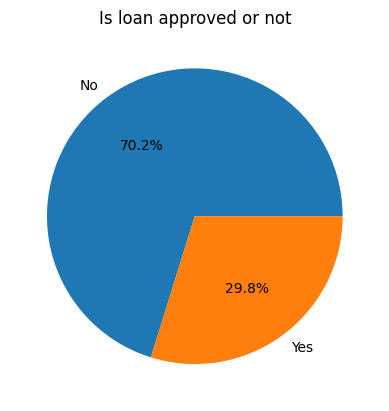

In [13]:
class_count = df["Loan_Approved"].value_counts()

plt.pie(class_count, labels = ["No","Yes"], autopct="%1.1f%%")
plt.title("Is loan approved or not")

[Text(0, 0, '621'), Text(0, 0, '379')]

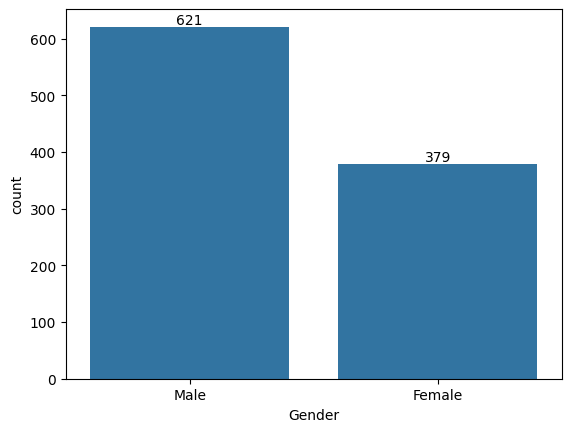

In [14]:
gender_cnt = df["Gender"].value_counts()
ax = sns.barplot(gender_cnt)
ax.bar_label(ax.containers[0])

[Text(0, 0, '722'), Text(0, 0, '278')]

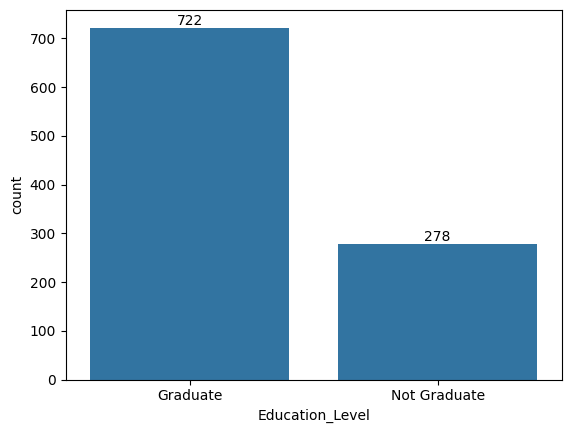

In [15]:
edu_cnt = df["Education_Level"].value_counts()
bx = sns.barplot(edu_cnt)
bx.bar_label(bx.containers[0])

<Axes: xlabel='Applicant_Income', ylabel='Count'>

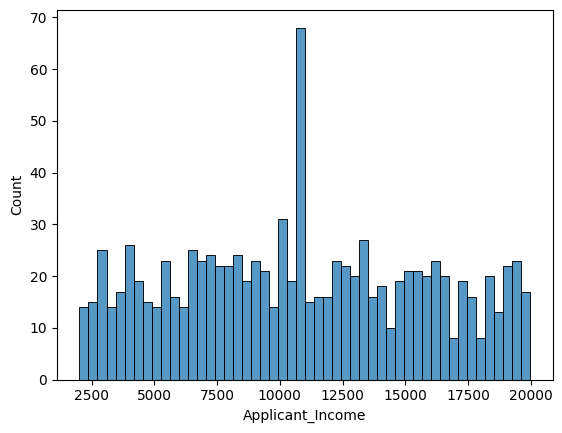

In [16]:
sns.histplot(
    data = df,
    x = "Applicant_Income",
    bins=50
)

<Axes: xlabel='Coapplicant_Income', ylabel='Count'>

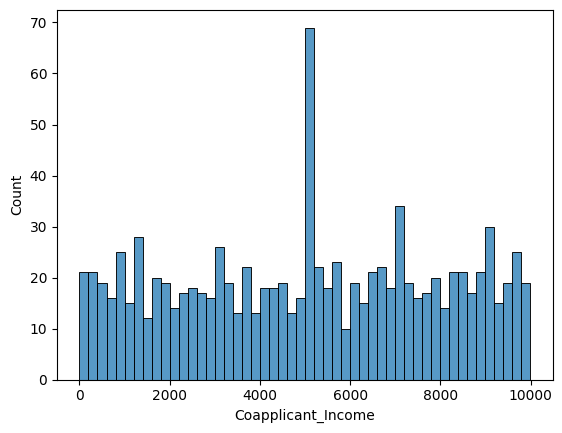

In [17]:
sns.histplot(
    data = df,
    x = "Coapplicant_Income",
    bins=50
)

<Axes: xlabel='Loan_Approved', ylabel='Applicant_Income'>

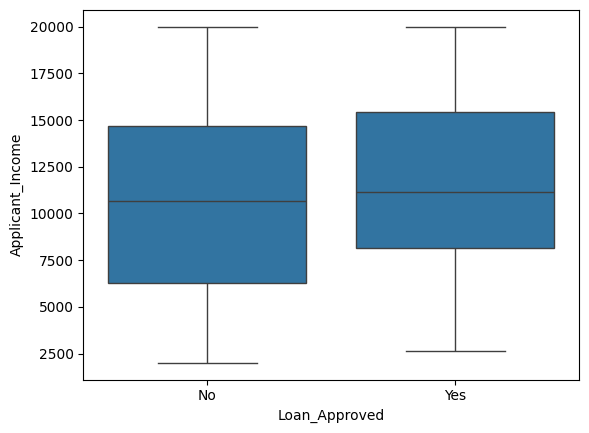

In [18]:
sns.boxplot(
    data=df,
    x="Loan_Approved",
    y="Applicant_Income"
)

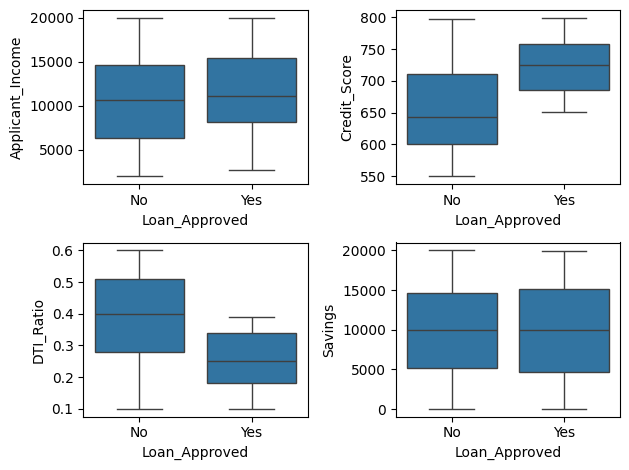

In [19]:
fig, axes = plt.subplots(2,2)

sns.boxplot(ax= axes[0,0],data=df,x="Loan_Approved",y="Applicant_Income")
sns.boxplot(ax= axes[0,1],data=df,x="Loan_Approved",y="Credit_Score")
sns.boxplot(ax= axes[1,0],data=df,x="Loan_Approved",y="DTI_Ratio")
sns.boxplot(ax= axes[1,1],data=df,x="Loan_Approved",y="Savings")
plt.tight_layout()

plt.show()

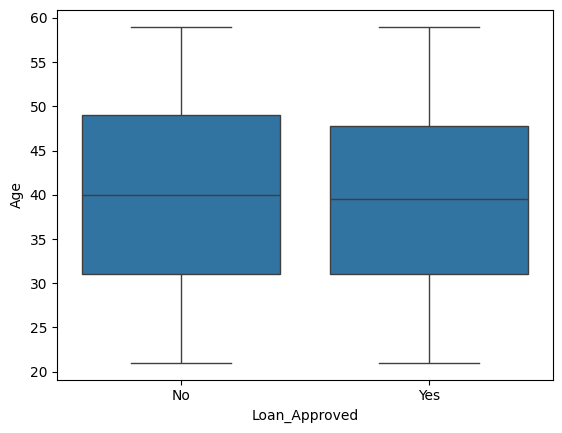

In [20]:
sns.boxplot(data=df,x="Loan_Approved",y="Age")
plt.show()

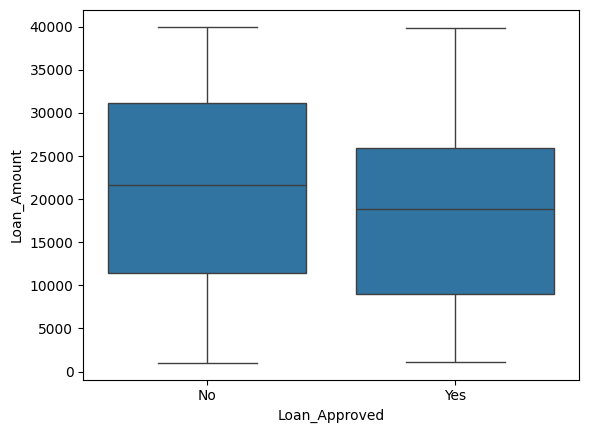

In [21]:
sns.boxplot(data=df,x="Loan_Approved",y="Loan_Amount")
plt.show()

<Axes: xlabel='Credit_Score', ylabel='Count'>

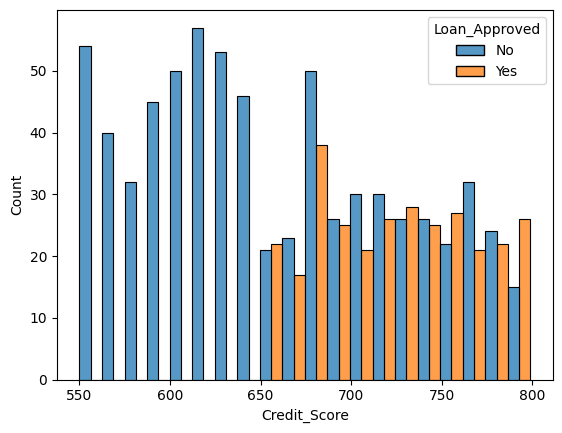

In [22]:
sns.histplot(data=df,
             x="Credit_Score",
             hue="Loan_Approved",
             bins=20,
            multiple="dodge")

<Axes: xlabel='Applicant_Income', ylabel='Count'>

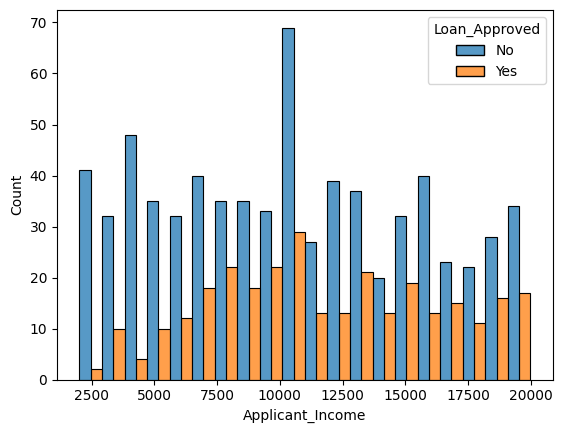

In [23]:
sns.histplot(data=df,
             x="Applicant_Income",
             hue="Loan_Approved",
             bins=20,
            multiple="dodge")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Applicant_ID        1000 non-null   float64
 1   Applicant_Income    1000 non-null   float64
 2   Coapplicant_Income  1000 non-null   float64
 3   Employment_Status   1000 non-null   object 
 4   Age                 1000 non-null   float64
 5   Marital_Status      1000 non-null   object 
 6   Dependents          1000 non-null   float64
 7   Credit_Score        1000 non-null   float64
 8   Existing_Loans      1000 non-null   float64
 9   DTI_Ratio           1000 non-null   float64
 10  Savings             1000 non-null   float64
 11  Collateral_Value    1000 non-null   float64
 12  Loan_Amount         1000 non-null   float64
 13  Loan_Term           1000 non-null   float64
 14  Loan_Purpose        1000 non-null   object 
 15  Property_Area       1000 non-null   object 
 16  Educati

# Encoding


In [25]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()
df["Education_Level"]= le.fit_transform(df["Education_Level"])
df["Loan_Approved"]= le.fit_transform(df["Loan_Approved"])

In [26]:
df.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Employment_Status,Age,Marital_Status,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,Loan_Term,Loan_Purpose,Property_Area,Education_Level,Gender,Employer_Category,Loan_Approved
0,1.0,17795.0,1387.0,Salaried,51.0,Married,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,84.0,Personal,Urban,1,Female,Private,0
1,2.0,2860.0,2679.0,Salaried,46.0,Married,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,48.0,Car,Semiurban,0,Male,Private,0
2,3.0,7390.0,2106.0,Salaried,25.0,Single,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,72.0,Business,Urban,0,Female,Government,1
3,4.0,13964.0,8173.0,Salaried,40.0,Married,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,60.0,Business,Rural,0,Female,Government,0
4,5.0,13284.0,4223.0,Self-employed,31.0,Single,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,72.0,Car,Urban,0,Male,Private,1


In [27]:
cols = ["Employment_Status", "Marital_Status", "Loan_Purpose", "Property_Area", "Gender", "Employer_Category"]

ohe = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

encoded = ohe.fit_transform(df[cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cols), index=df.index)

df = pd.concat([df.drop(columns=cols), encoded_df], axis=1)

In [28]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Applicant_ID                     1000 non-null   float64
 1   Applicant_Income                 1000 non-null   float64
 2   Coapplicant_Income               1000 non-null   float64
 3   Age                              1000 non-null   float64
 4   Dependents                       1000 non-null   float64
 5   Credit_Score                     1000 non-null   float64
 6   Existing_Loans                   1000 non-null   float64
 7   DTI_Ratio                        1000 non-null   float64
 8   Savings                          1000 non-null   float64
 9   Collateral_Value                 1000 non-null   float64
 10  Loan_Amount                      1000 non-null   float64
 11  Loan_Term                        1000 non-null   float64
 12  Education_Level      

# Correlation Heatmap



In [29]:
num_cols = df.select_dtypes(include="number")
corr_matrix= num_cols.corr()

In [30]:
num_cols.corr()["Loan_Approved"].sort_values(ascending=False)

Loan_Approved                      1.000000
Credit_Score                       0.451175
Applicant_Income                   0.119796
Employer_Category_MNC              0.069049
Loan_Purpose_Personal              0.034043
Marital_Status_Single              0.030182
Property_Area_Urban                0.025963
Collateral_Value                   0.021868
Coapplicant_Income                 0.004230
Loan_Purpose_Home                  0.002118
Employment_Status_Self-employed   -0.001337
Employer_Category_Private         -0.003347
Applicant_ID                      -0.011167
Property_Area_Semiurban           -0.012967
Savings                           -0.013437
Loan_Purpose_Education            -0.016684
Employer_Category_Unemployed      -0.021468
Age                               -0.022343
Dependents                        -0.023811
Existing_Loans                    -0.034794
Employer_Category_Government      -0.039187
Employment_Status_Salaried        -0.041428
Employment_Status_Unemployed    

<Axes: >

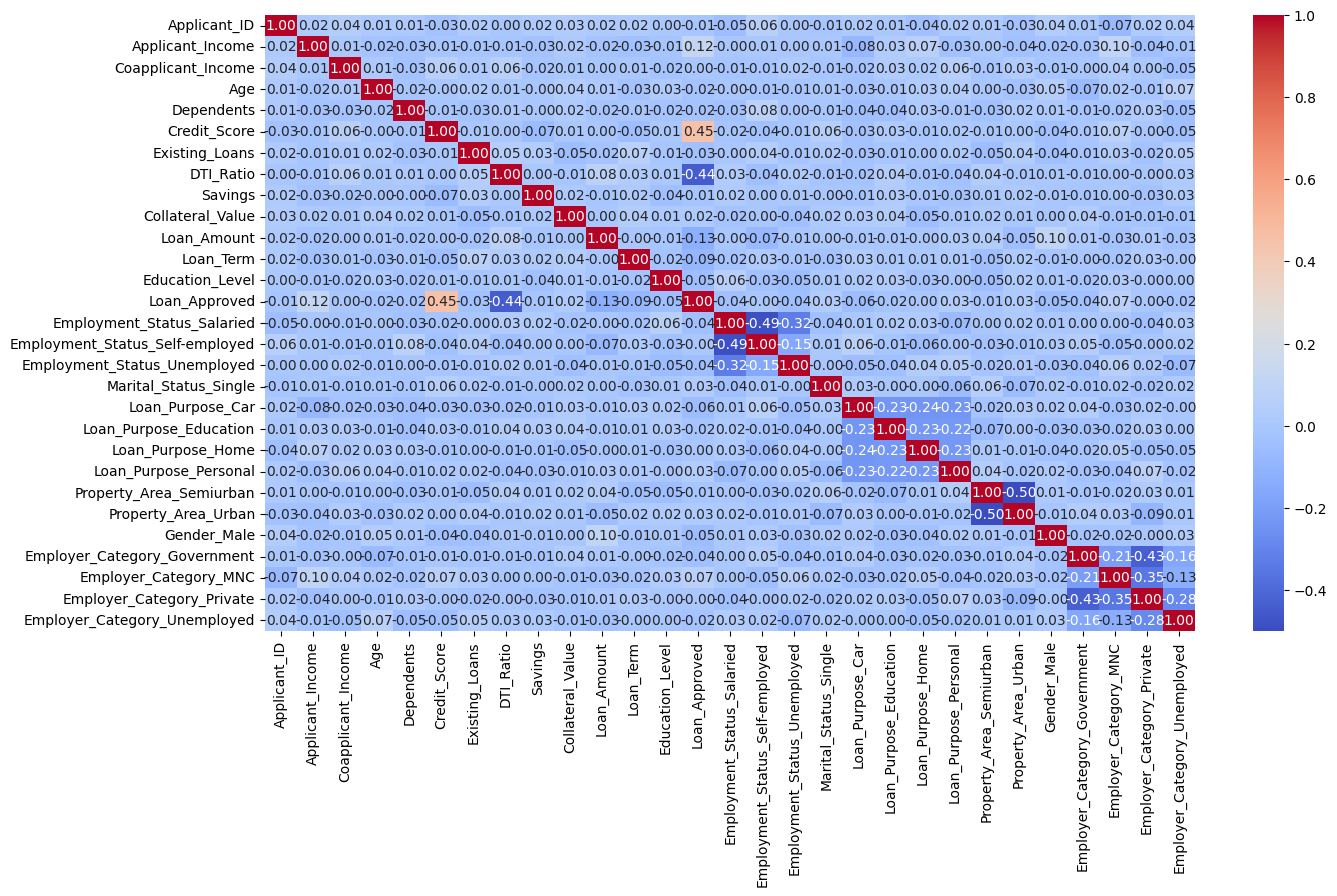

In [31]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f",cmap="coolwarm")

# Train+Test+Split & Feature Scaling

In [32]:
x = df.drop(["Loan_Approved","Applicant_ID"],axis=1)
y = df["Loan_Approved"]

In [33]:
x.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
0,17795.0,1387.0,51.0,0.0,637.0,4.0,0.53,19403.0,45638.0,16619.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,2860.0,2679.0,46.0,3.0,621.0,2.0,0.30,2580.0,49272.0,38687.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7390.0,2106.0,25.0,2.0,674.0,4.0,0.20,13844.0,6908.0,27943.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,13964.0,8173.0,40.0,2.0,579.0,3.0,0.31,9553.0,10844.0,27819.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,13284.0,4223.0,31.0,2.0,721.0,1.0,0.29,9386.0,37629.0,12741.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [34]:
x_test, x_train, y_test, y_train = train_test_split(x,y, test_size=0.2, random_state=50)

In [35]:
x_test.head()

,Applicant_Income,Coapplicant_Income,Age,Dependents,Credit_Score,Existing_Loans,DTI_Ratio,Savings,Collateral_Value,Loan_Amount,...,Loan_Purpose_Education,Loan_Purpose_Home,Loan_Purpose_Personal,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed
886,3854.0,7574.0,40.0,3.0,588.0,1.950526,0.28,13311.000000,13731.0,12218.0,...,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
488,12150.0,7867.0,34.0,2.0,588.0,4.000000,0.21,9940.452632,40399.0,14919.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
265,19364.0,8228.0,26.0,0.0,592.0,1.000000,0.23,6312.000000,23092.0,4338.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
112,3059.0,1750.0,49.0,0.0,770.0,4.000000,0.13,15456.000000,5067.0,6695.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
650,12488.0,4909.0,29.0,3.0,709.0,3.000000,0.44,9157.000000,24563.0,24457.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)

In [37]:
x_train_scaled

array([[ 1.53793611, -0.2156815 , -1.62401084, ..., -0.36047677,
         1.12815215, -0.33333333],
       [ 1.32646286,  1.20094688, -1.43254695, ..., -0.36047677,
         1.12815215, -0.33333333],
       [-1.69097018, -1.21107495, -1.81547473, ..., -0.36047677,
         1.12815215, -0.33333333],
       ...,
       [ 0.42417699,  1.64616301,  0.48209197, ..., -0.36047677,
        -0.88640526, -0.33333333],
       [-0.62634749,  1.01118263,  0.48209197, ..., -0.36047677,
         1.12815215, -0.33333333],
       [ 0.77082726, -0.75786508,  1.53514338, ..., -0.36047677,
        -0.88640526, -0.33333333]], shape=(200, 27))

# Train and Evaluate models

In [38]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(x_train_scaled, y_train)

y_pred = log_model.predict(x_test_scaled)

#Evaluation
print("Logistic Regression Model Evaluation:")
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Logistic Regression Model Evaluation:
Precision: 0.6795366795366795
Recall: 0.7553648068669528
F1 Score: 0.7154471544715447
Accuracy: 0.825
Confusion Matrix: [[484  83]
 [ 57 176]]


In [39]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train_scaled, y_train)

y_pred = knn_model.predict(x_test_scaled)

#Evaluation
print("KNN Model Evaluation:")
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

KNN Model Evaluation:
Precision: 0.6011904761904762
Recall: 0.4334763948497854
F1 Score: 0.5037406483790524
Accuracy: 0.75125
Confusion Matrix: [[500  67]
 [132 101]]


In [40]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(x_train_scaled, y_train)

y_pred = nb_model.predict(x_test_scaled)

#Evaluation
print("Naive Bayes Model Evaluation:")
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Confusion Matrix:",confusion_matrix(y_test,y_pred))

Naive Bayes Model Evaluation:
Precision: 0.7832512315270936
Recall: 0.6824034334763949
F1 Score: 0.7293577981651376
Accuracy: 0.8525
Confusion Matrix: [[523  44]
 [ 74 159]]


# Best Model on the basis of Precision=> Naive Bayes

# Feature Engineering

In [43]:
#Add or transform features
df["DTI_Ratio_sq"]= df["DTI_Ratio"] ** 2
df["Credit_Score_sq"]= df["Credit_Score"] ** 2

df["Applicant_income_log"]= np.log1p(df["Applicant_Income"])

X = df.drop(columns=["Loan_Approved","DTI_Ratio","Credit_Score"])
Y = df["Loan_Approved"]

#Train test split
X_test, X_train, Y_test, Y_train = train_test_split(X,Y, test_size=0.2, random_state=50)

#Scaling
scaler = StandardScaler()
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [44]:
 X_train.head()

,Applicant_ID,Applicant_Income,Coapplicant_Income,Age,Dependents,Existing_Loans,Savings,Collateral_Value,Loan_Amount,Loan_Term,...,Property_Area_Semiurban,Property_Area_Urban,Gender_Male,Employer_Category_Government,Employer_Category_MNC,Employer_Category_Private,Employer_Category_Unemployed,DTI_Ratio_sq,Credit_Score_sq,Applicant_income_log
316,317.0,18388.0,4543.000000,24.0,3.0,2.0,12500.000000,5914.000000,22545.0,24.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.336400,625681.0,9.819508
459,460.0,17368.0,8619.000000,26.0,2.0,3.0,4233.000000,24802.792632,5131.0,24.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.120592,396900.0,9.762442
854,855.0,2814.0,1679.000000,22.0,2.0,0.0,5113.000000,45235.000000,4098.0,48.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.040000,544644.0,7.942718
11,12.0,10322.0,8428.000000,41.0,1.0,4.0,9940.452632,38333.000000,12085.0,84.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.052900,552049.0,9.242130
978,979.0,6425.0,5082.455789,45.0,0.0,0.0,9327.000000,1137.000000,23705.0,84.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176400,447561.0,8.768108


In [45]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

log_model = LogisticRegression()
log_model.fit(X_train_scaled, Y_train)

Y_pred = log_model.predict(X_test_scaled)

#Evaluation
print("Logistic Regression Model Evaluation:")
print("Precision:",precision_score(Y_test,Y_pred))
print("Recall:",recall_score(Y_test,Y_pred))
print("F1 Score:",f1_score(Y_test,Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix:",confusion_matrix(Y_test,Y_pred))

Logistic Regression Model Evaluation:
Precision: 0.7258064516129032
Recall: 0.7725321888412017
F1 Score: 0.7484407484407485
Accuracy: 0.84875
Confusion Matrix: [[499  68]
 [ 53 180]]


In [46]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train_scaled, Y_train)

Y_pred = knn_model.predict(X_test_scaled)

#Evaluation
print("KNN Model Evaluation:")
print("Precision:",precision_score(Y_test,Y_pred))
print("Recall:",recall_score(Y_test,Y_pred))
print("F1 Score:",f1_score(Y_test,Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix:",confusion_matrix(Y_test,Y_pred))

KNN Model Evaluation:
Precision: 0.631578947368421
Recall: 0.463519313304721
F1 Score: 0.5346534653465347
Accuracy: 0.765
Confusion Matrix: [[504  63]
 [125 108]]


In [47]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train_scaled, Y_train)

Y_pred = nb_model.predict(X_test_scaled)

#Evaluation
print("Naive Bayes Model Evaluation:")
print("Precision:",precision_score(Y_test,Y_pred))
print("Recall:",recall_score(Y_test,Y_pred))
print("F1 Score:",f1_score(Y_test,Y_pred))
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Confusion Matrix:",confusion_matrix(Y_test,Y_pred))

Naive Bayes Model Evaluation:
Precision: 0.7941176470588235
Recall: 0.6952789699570815
F1 Score: 0.7414187643020596
Accuracy: 0.85875
Confusion Matrix: [[525  42]
 [ 71 162]]
